<h1 style="font-family: 'Playfair Display', serif; color: yellow; text-shadow: 1px 1px 2px #f3faffff;">
  Simple parallel workflow using LangGraph
</h1>


In [73]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict

In [74]:
class BatsmanState(TypedDict):
    run : int
    balls : int
    fours : int
    sixes : int

    sr : float
    bpb : float
    boundary_percent : float
    summary : str

In [75]:
def calculate_sr(state : BatsmanState) -> BatsmanState:
    sr = (state['run']/state['balls'])*100

    return {'sr':sr}

In [76]:
def calculate_bpb(state : BatsmanState) -> BatsmanState:
    bpb = state['balls']/(state['fours'] + state['sixes'])
    state['bpb'] = bpb
    return {"bpb":bpb}

In [77]:
def  calculate_boundary_percent(state : BatsmanState) -> BatsmanState:
    boundary_percent = (((state['fours']*4) + (state['sixes']*6))/state['run'])*100
    
    return {"boundary_percent":boundary_percent}

In [78]:
def summary1(state : BatsmanState) -> BatsmanState:
    summary = f''' 
strike_rate - {state['sr']}\n
balls_per_boundary = {state['bpb']}\n
boundary_percent = {state['boundary_percent']}
'''
    state['summary'] = summary
    return state

In [79]:
graph = StateGraph(BatsmanState)

graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundary_percent", calculate_boundary_percent )
graph.add_node("summary1", summary1)

##edges

graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundary_percent")


graph.add_edge("calculate_sr", 'summary1')
graph.add_edge("calculate_bpb", 'summary1')
graph.add_edge("calculate_boundary_percent", 'summary1')

##summary to end

graph.add_edge("summary1" ,END)


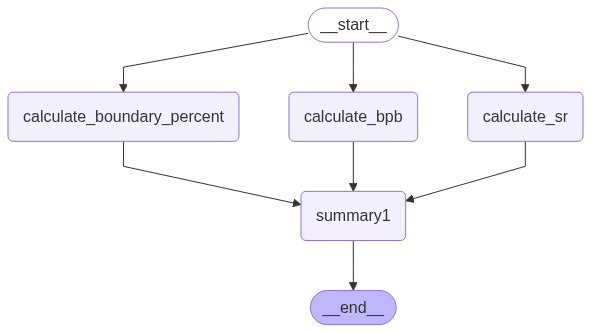

In [80]:
graph.compile()

In [81]:
workflow = graph.compile()

In [82]:
initial_state = {"run":100,
                 "balls":50,
                 "fours":6,
                 "sixes":4}

In [83]:
workflow.invoke(initial_state)

{'run': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': ' \nstrike_rate - 200.0\n\nballs_per_boundary = 5.0\n\nboundary_percent = 48.0\n'}